In [1]:
# importing prerequisite libraries
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import os
from textblob import TextBlob
from glob import glob
from tqdm import tqdm

This dataset is made up of various texts thus we will use glob to upload all of them and join them into one dataset.

In [2]:
filepath = glob(r'../tochora/baba/FinancialPhraseBank/*.txt')
articles = []
for filepath in tqdm(filepath):
    try:
        f = open(filepath, 'r')
        news_articles = f.read()
        articles.append(str(news_articles))
    except:
        f = open(filepath,'rb')
        news_articles = f.read()
        articles.append(str(news_articles))


100%|██████████| 6/6 [00:02<00:00,  2.46it/s]


In [3]:
# a sample of the text
articles[1]

'===========================================================\n\n   Documentation for Financial Phrase Bank v.1.0\n\n===========================================================\n\nContents:\n\n1. Introduction\n2. Data\n3. Acknowledgements\n4. Contact Information\n5. References\n\n-----------------------------------------------------------\n\n1. Introduction\n\nThe key arguments for the low utilization of statistical techniques in financial sentiment analysis have been the difficulty of implementation for practical applications and the lack of high quality training data for building such models. Especially in the case of finance and economic texts, annotated collections are a scarce resource and many are reserved for proprietary use only. To resolve the missing training data problem, we present a collection of âˆ¼ 5000 sentences to establish human-annotated standards for benchmarking alternative modeling techniques. \n\nThe objective of the phrase level annotation task was to classify ea

The above text contains dashes, punctuation marks which will need to be cleaned.

In [4]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
ps = PorterStemmer()
#creating an empty list
clean_articles = []
for arrticles in tqdm(articles):
    # removing single dashes in the text
    arrticlles = arrticles.replace('\n----\n\n', ' ')
    # removing double dashes in the text
    arrticlles = arrticles.replace('\n\n====\n\n', ' ')
    # removing punctuation marks
    arrticles = re.sub('[^a-zA-Z]',' ', arrticlles)
    # converting text from proper case into lower case
    articles= arrticles.lower()
    # creating spaces between words
    words = arrticles.split()
    # modifiying words from various forms into their basic structure and then removing stopwords
    clean_articlle = [ps.stem(word) for word in words if word not in set(stopwords.words('english'))]
    # joining words to remove spaces
    clean_article = " ".join(clean_articlle)
    # appending all changes in the text into our empty list
    clean_articles.append(clean_article)


100%|██████████| 6/6 [02:54<00:00, 29.05s/it]


In [5]:
# a smaple of the cleaned text
clean_articles[1]

'document financi phrase bank v content introduct data acknowledg contact inform refer introduct the key argument low util statist techniqu financi sentiment analysi difficulti implement practic applic lack high qualiti train data build model especi case financ econom text annot collect scarc resourc mani reserv proprietari use to resolv miss train data problem present collect sentenc establish human annot standard benchmark altern model techniqu the object phrase level annot task classifi exampl sentenc posit neg neutral categori consid inform explicitli avail given sentenc sinc studi focus financi econom domain annot ask consid sentenc view point investor e whether news may posit neg neutral influenc stock price as result sentenc sentiment relev econom financi perspect consid neutral data thi releas financi phrase bank cover collect sentenc the select collect phrase annot peopl adequ background knowledg financi market three annot research remain annot master student aalto univers sch

In [6]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
 # create a vector of relevant words
articles_vectors = tfid.fit_transform(clean_articles)

In [7]:
articles_vectors

<6x6781 sparse matrix of type '<class 'numpy.float64'>'
	with 22682 stored elements in Compressed Sparse Row format>

In [8]:
# applying Singular-Value Decomposition which reduces a matrix of words in our texts into a component.
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2000)
reduced_articles = svd.fit_transform(articles_vectors)


In [9]:

from sklearn.cluster import KMeans
# an empty list to store squared distances of each cluster
ssd = []
# for each cluster
for k in tqdm(range(2, 7)):
    km = KMeans(n_clusters=k)
    # fit the model
    km = km.fit(reduced_articles)
    # appending the squared distances into the list
    ssd.append(km.inertia_)


100%|██████████| 5/5 [00:02<00:00,  2.34it/s]


Text(0, 0.5, 'ssd')

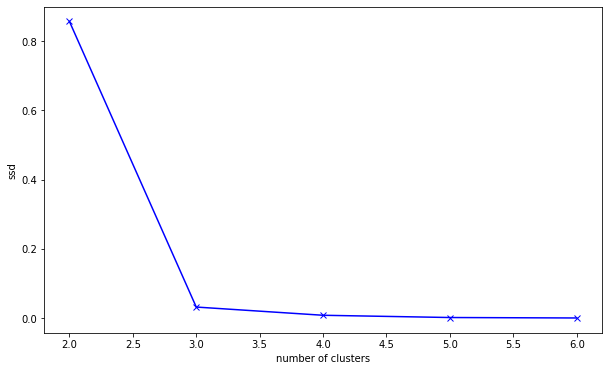

In [10]:
# coming up with an elbow plot that shows the apprppriate number of clusters to be used in the model
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), ssd, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('ssd')

elbow point is formed at 3 thus the appropriate number of clusters is 3

In [18]:
# applying our model in our text
kmeans = KMeans(n_clusters=3)
# fitting the text
kn =kmeans.fit_predict(reduced_articles)
# creating the labels
labels = kmeans.labels_

In [21]:
# creating a dataframe showing number of articles  and their cluster labels as columns
df_dict = {'news': articles, 'labels_km': labels}
df = pd.DataFrame(df_dict)
df.head(10)

,news,labels_km
0,according to gran the company has no plans t...,1
1,according to gran the company has no plans t...,2
2,according to gran the company has no plans t...,0
3,according to gran the company has no plans t...,0
4,according to gran the company has no plans t...,0
5,according to gran the company has no plans t...,0


A wordcloud is a visual representation of words in a text. The bigger the word, the more frequent and relevant it is.The following are wordclouds of various articles in our dataset

In [ ]:
# a function to visualize the text in the articles
from wordcloud import WordCloud
def wc_viz(df,label_col, label):
    plt.figure(figsize=(20, 12))
    text = " ".join(df[df[label_col]==label]['news'].values)
    wc = WordCloud(stopwords=stopwords.words('english'),height=400, width=1000, background_color='black', colormap='RdBu').generate(text)
    plt.title(f'words common in {label} texts')
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [ ]:

df[df['labels_km']==0]['news'].values[0][:-20]

'according to gran   the company has no plans to move all production to russia   although that is where the company is growing   neutral for the last quarter of        componenta  s net sales doubled to eur   m from eur  m for the same period a year earlier   while it moved to a zero pre tax profit from a pre tax loss of eur m   positive in the third quarter of        net sales increased by       to eur       mn   and operating profit by        to eur      mn   positive operating profit rose to eur      mn from eur     mn in the corresponding period in      representing       of net sales   positive operating profit totalled eur      mn   up from eur      mn in        representing       of net sales   positive finnish talentum reports its operating profit increased to eur      mn in      from eur     mn in        and net sales totaled eur       mn   up from eur      mn   positive clothing retail chain sepp  l    s sales increased by     to eur       mn   and operating profit rose to eu

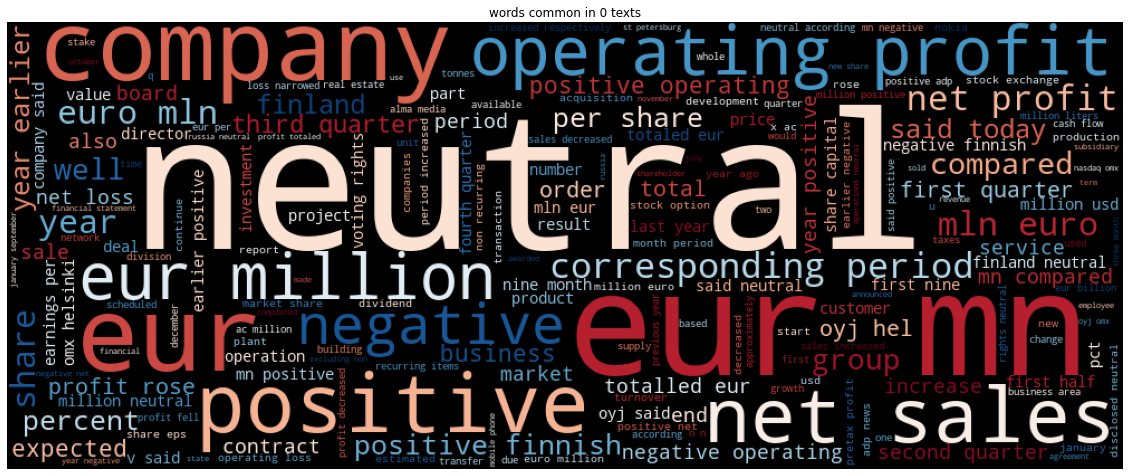

In [ ]:
wc_viz(df,'labels_km', 0)

In [ ]:
df[df['labels_km']==1]['news'].values[0]

'according to gran   the company has no plans to move all production to russia   although that is where the company is growing   neutral for the last quarter of        componenta  s net sales doubled to eur   m from eur  m for the same period a year earlier   while it moved to a zero pre tax profit from a pre tax loss of eur m   positive in the third quarter of        net sales increased by       to eur       mn   and operating profit by        to eur      mn   positive operating profit rose to eur      mn from eur     mn in the corresponding period in      representing       of net sales   positive operating profit totalled eur      mn   up from eur      mn in        representing       of net sales   positive finnish talentum reports its operating profit increased to eur      mn in      from eur     mn in        and net sales totaled eur       mn   up from eur      mn   positive clothing retail chain sepp  l    s sales increased by     to eur       mn   and operating profit rose to eu

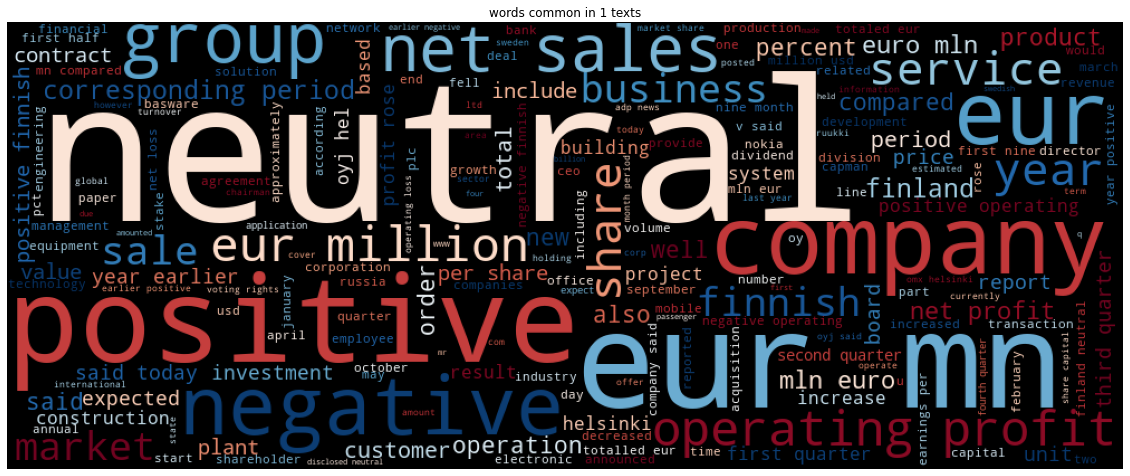

In [ ]:
wc_viz(df, 'labels_km', 1)

In [ ]:
df[df['labels_km']==2]['news'].values[0]

'according to gran   the company has no plans to move all production to russia   although that is where the company is growing   neutral for the last quarter of        componenta  s net sales doubled to eur   m from eur  m for the same period a year earlier   while it moved to a zero pre tax profit from a pre tax loss of eur m   positive in the third quarter of        net sales increased by       to eur       mn   and operating profit by        to eur      mn   positive operating profit rose to eur      mn from eur     mn in the corresponding period in      representing       of net sales   positive operating profit totalled eur      mn   up from eur      mn in        representing       of net sales   positive finnish talentum reports its operating profit increased to eur      mn in      from eur     mn in        and net sales totaled eur       mn   up from eur      mn   positive clothing retail chain sepp  l    s sales increased by     to eur       mn   and operating profit rose to eu

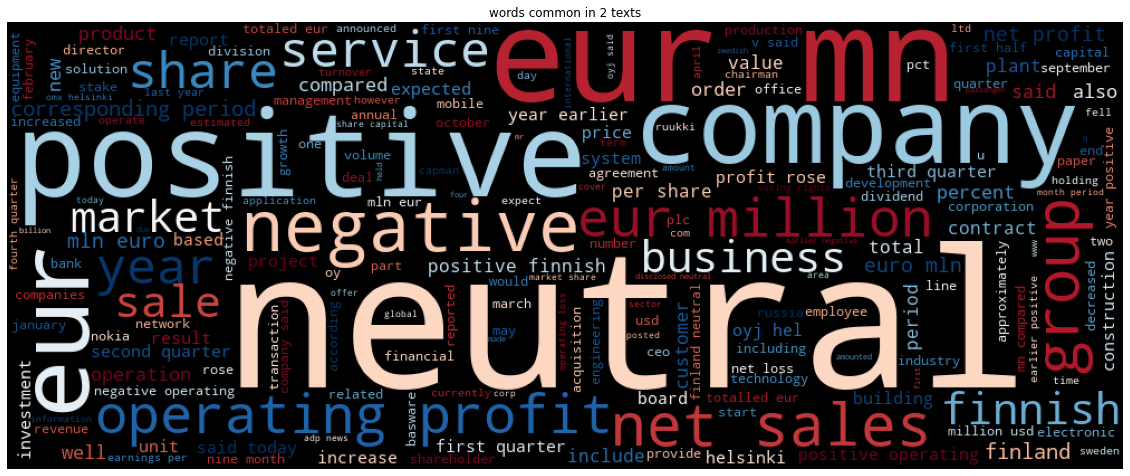

In [ ]:
wc_viz(df, 'labels_km', 2)